# Shopping Behaviour Data analysis 

This dataset provides detailed insights into consumer behaviour and shopping patterns across various demographics, locations, and product categories. It contains 3,900 customer records with 18 attributes that describe purchase details, shopping habits, and preferences.

## The dataset includes information such as:

●  Customer demographics (age, gender, location)

●  Product details (item purchased, category, size, color, season)

●  Purchase information (amount spent in USD, payment method, shipping type)

●  Shopping behaviour (frequency of purchases, previous purchases, subscription status, discount usage, promo codes)

●  Customer feedback (review ratings)

Researchers, data analysts, and students can use this dataset to practice **customer segmentation, predictive modelling, recommendation systems, and market basket analysis**. It also serves as a valuable resource for learning techniques in **exploratory data analysis (EDA), machine learning, and business analytics**.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datset

In [2]:
df = pd.read_csv(r"C:\Users\abhir\Downloads\shopping_behavior_updated.csv")

## Initial overview

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Consise summery

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

### Statistical summary for numerical columns

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Check data types of all columns 

In [6]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

### Number of rows and columns

In [7]:
df.shape

(3900, 18)

### The count of missing values in each column

In [8]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Number of unique values per column

In [9]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

## Data cleaning and preprocessing

### checking for duplicated value

In [10]:
df.duplicated().sum()

np.int64(0)

### Convert Subscription Status and Discount to category/boolean

Type Conversions: We ensure categorical columns use consistent types. For example, convert Subscription Status from "Yes"/"No" to boolean or category. We also confirm numeric fields are numeric.

In [11]:
df['Subscription Status'] = df['Subscription Status'].astype('category')
df['Discount Applied'] = df['Discount Applied'].astype('bool')

### Drop one of Promo Code Used or Discount as they are redundant
Redundant Columns: We note that “Promo Code Used” is perfectly correlated with “Discount Applied” (all entries where discount=yes also have a promo code). We dropped “Promo Code Used” above to avoid duplication.

In [12]:
df= df.drop(columns= ['Promo Code Used'])

#### Frequency of Purchases: Some synonyms exist – e.g., “Fortnightly” vs “Bi-Weekly” (both mean every 2 weeks), and “Quarterly” vs “Every 3 Months”. We unify these.

In [13]:
freq_map = {'Fortnightly': 'Bi-Weekly',
           'Every 3 Months':'Quarterly'}

df['Frequency of Purchases']= df['Frequency of Purchases'].replace(freq_map)

In [14]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,True,14,Venmo,Bi-Weekly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,True,2,Cash,Bi-Weekly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,True,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,True,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,True,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,True,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,True,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,True,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,True,24,Venmo,Weekly


### Age Group Segmentatiom

Age Group: Segment ages into bins. Commonly, customers are grouped by age (a form of customer segmentation)
. We define age brackets and label them (e.g. “18-25”, “26-35”, etc.):

In [15]:
bins = [17, 25, 35, 45, 55, 65, 100]
labels= ['18-25','26-35','36-45','46-55','56-65','66+']
df['Age Group']= pd.cut(df['Age'], bins= bins, labels= labels, include_lowest= True)
df['Age Group'].value_counts().sort_index()

Age Group
18-25    571
26-35    742
36-45    729
46-55    753
56-65    750
66+      355
Name: count, dtype: int64

In [16]:
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,True,14,Venmo,Bi-Weekly,46-55
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,True,2,Cash,Bi-Weekly,18-25
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,True,23,Credit Card,Weekly,46-55
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,True,49,PayPal,Weekly,18-25
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,True,31,PayPal,Annually,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,True,32,Venmo,Weekly,36-45
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,True,41,Bank Transfer,Bi-Weekly,46-55
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,True,24,Venmo,Quarterly,46-55
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,True,24,Venmo,Weekly,36-45


### Spending level segmentation

Spending Level: We classify customers by Purchase Amount (USD) into tiers (e.g. “Low”, “Medium”, “High”). We use the 33rd and 66th percentiles to split roughly into three equal groups.

Each level contains about one-third of the customers, facilitating comparison by spending tier.

In [17]:
thresholds = [0, df['Purchase Amount (USD)'].quantile(0.33),
             df['Purchase Amount (USD)'].quantile(0.66),
             df['Purchase Amount (USD)'].max()]

labels = ['Low', 'Medium', 'High']
df['Spending Level']= pd.cut(df['Purchase Amount (USD)'], labels = labels, bins = thresholds, include_lowest= True)

df['Spending Level'].value_counts()

Spending Level
Medium    1303
Low       1300
High      1297
Name: count, dtype: int64

### Loyalty Segmentation

Based on Previous Purchases, we define new customers vs frequent shoppers. For example, categorize customers with 1–10 past purchases as “New”, 11–30 as “Occasional”, and 31+ as “Frequent”. This aligns with segmenting by purchase frequency.


In [18]:
loyalty_bins= [0, 10, 30, 100]
df['Loyalty Segment']= pd.cut(df['Previous Purchases'], bins= loyalty_bins,
labels=['New', 'Occassional', 'Frequent'],
include_lowest= True)

df['Loyalty Segment'].value_counts()



Loyalty Segment
Occassional    1567
Frequent       1549
New             784
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

### Age Distribution

In [19]:
df['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

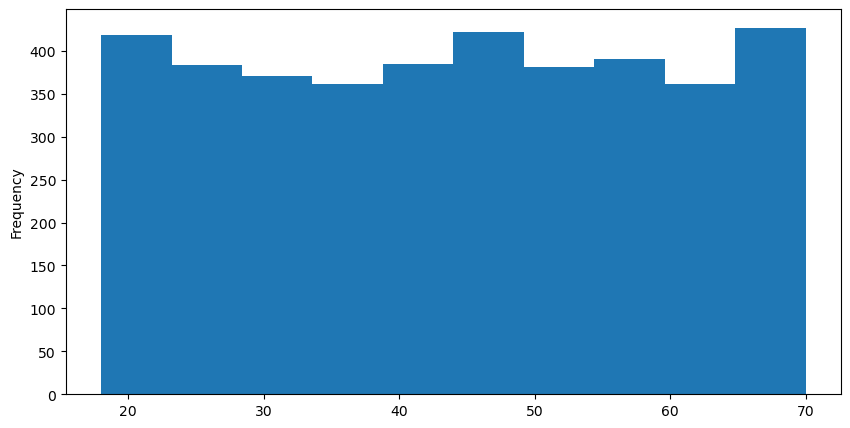

In [44]:
plt.figure(figsize= (10,5))
df['Age'].plot(kind= 'hist');

## Purchase Amount (USD)

In [21]:
df['Purchase Amount (USD)'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

## Review Rating

In [22]:
df['Review Rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

<Axes: ylabel='Frequency'>

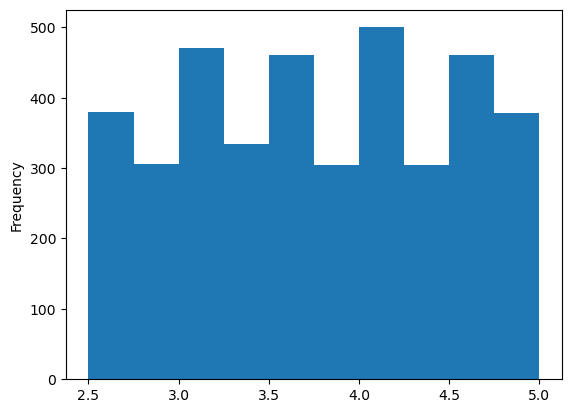

In [23]:
df['Review Rating'].plot(kind='hist')

## Previous Purchases

In [24]:
df['Previous Purchases'].describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64

## Categorical Variables: We check frequencies.

### gender

In [25]:
df['Gender'].value_counts()


Gender
Male      2652
Female    1248
Name: count, dtype: int64

### Category

In [26]:
df['Category'].value_counts()


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

### Season

In [27]:
df['Season'].value_counts()


Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

### Payment Method

In [28]:
df['Payment Method'].value_counts()


Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

### Shipping Type

In [29]:
df['Shipping Type'].value_counts()


Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

### Frequency of purchases

In [30]:
df['Frequency of Purchases'].value_counts()


Frequency of Purchases
Quarterly    1147
Bi-Weekly    1089
Annually      572
Monthly       553
Weekly        539
Name: count, dtype: int64

## Bivariate Analysis

### Purchase Amount vs Gender

Females mean 60.25, Males mean 59.54 (medians both 60.00). There is only a slight difference female purchases are on average about $0.7 higher. In essence, spending is similar across genders.

In [31]:
df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'median'])

,mean,median
Gender,,
Female,60.249199,60.0
Male,59.536199,60.0


### Purchase Amount vs Age Group

The youngest group (18–25) spends 60.65 on average; middle ages (26–55) around 59–60; seniors (66+) about 58.88. No dramatic trend, though the youngest and mid-40s appear slightly higher spenders. Middle age groups (35–45, 56–65) spend around 59.3. Spending is fairly consistent across ages.

In [32]:
df.groupby('Age Group', observed= True)['Purchase Amount (USD)'].mean().round(2)

Age Group
18-25    60.65
26-35    59.76
36-45    59.31
46-55    60.58
56-65    59.14
66+      58.88
Name: Purchase Amount (USD), dtype: float64

### Purchase Amount vs Category

Outerwear (mean 57.17) is somewhat lower than Clothing/Accessories/Footwear (60.0–60.3). This could reflect Outerwear items being lower-priced in this dataset. Possibly because many inexpensive items are flagged as Outerwear (or due to season promotions). Median values show a similar pattern

In [33]:
df.groupby('Category')['Purchase Amount (USD)'].mean().round(2)
df.groupby('Category')['Purchase Amount (USD)'].median()

Category
Accessories    60.0
Clothing       60.0
Footwear       60.0
Outerwear      54.5
Name: Purchase Amount (USD), dtype: float64

### Review Rating vs Payment Method

Credit Card users give the highest average rating (3.783). Bank Transfer users rate lowest (3.702). Other methods (Cash, Debit, PayPal, Venmo) are intermediate (3.75). Differences are small (<0.08 difference), but we note that credit-card customers are slightly more satisfied on average.

In [34]:
df.groupby('Payment Method')['Review Rating'].mean().round(3)

Payment Method
Bank Transfer    3.702
Cash             3.750
Credit Card      3.783
Debit Card       3.760
PayPal           3.750
Venmo            3.752
Name: Review Rating, dtype: float64

### Age Group vs Frequency of Purchases

Younger customers (18–25) have a higher proportion buying Weekly/Bi-Weekly compared to older groups. For example, 18–25 group has 12% weekly, 13% bi-weekly. whereas seniors (66+) have 9% weekly, 10% bi-weekly. Older groups have relatively more yearly/quarterly. This suggests younger customers shop more frequently.

In [35]:
freq_table= pd.crosstab(df['Age Group'], df['Frequency of Purchases'], normalize= 'index')*100

In [36]:
freq_table.round(2)

Frequency of Purchases,Annually,Bi-Weekly,Monthly,Quarterly,Weekly
Age Group,,,,,
18-25,16.46,28.55,12.43,30.12,12.43
26-35,11.73,30.46,14.69,29.92,13.21
36-45,15.78,26.75,15.23,27.57,14.68
46-55,11.82,28.95,14.61,30.28,14.34
56-65,18.27,26.53,13.07,27.73,14.40
66+,14.08,24.79,15.21,32.68,13.24


### Season and Gender vs Spending - average spending by season and gender

Both genders spend more in Fall (61.55) and Winter (60.25) vs Spring (58.75). In Summer, females spend about 60.60, males 57.41, a notable gap. Fall spending is highest and nearly identical for both sexes (61.55). Spring is lowest (around 58.7)

In [37]:
pd.pivot_table(df, index='Season', columns='Gender', 
               values='Purchase Amount (USD)', aggfunc='mean').round(2)


Gender,Female,Male
Season,,
Fall,61.56,61.55
Spring,58.79,58.71
Summer,60.60,57.41
Winter,60.00,60.52


### Category vs Season - briefly checking how categories distribute by season

Outerwear purchases are fairly evenly spread across seasons, but a slight increase is seen in Fall (27%), possibly due to cooler weather. Summer shows the lowest share (23%), suggesting less demand for Outerwear during hotter months.

In [38]:
df[df['Category']=='Outerwear']['Season'].value_counts(normalize=True)


Season
Fall      0.271605
Spring    0.250000
Winter    0.246914
Summer    0.231481
Name: proportion, dtype: float64

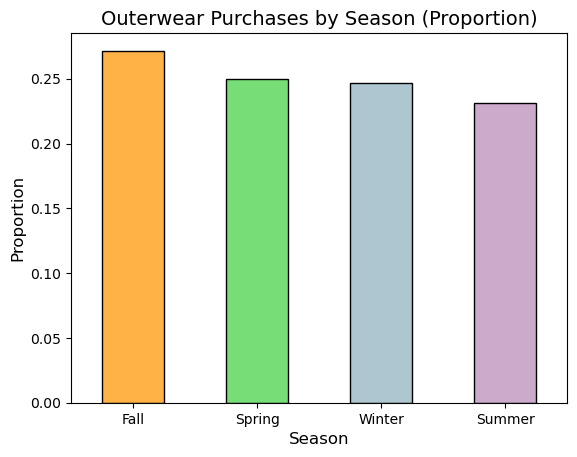

In [39]:

outerwear_season = df[df['Category']=='Outerwear']['Season'].value_counts(normalize=True)

outerwear_season.plot(kind='bar', color=['#FFB347','#77DD77','#AEC6CF','#CBAACB'], edgecolor='black')

plt.title("Outerwear Purchases by Season (Proportion)", fontsize=14)
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Season", fontsize=12)
plt.xticks(rotation=0)
plt.show()


## Visualisation

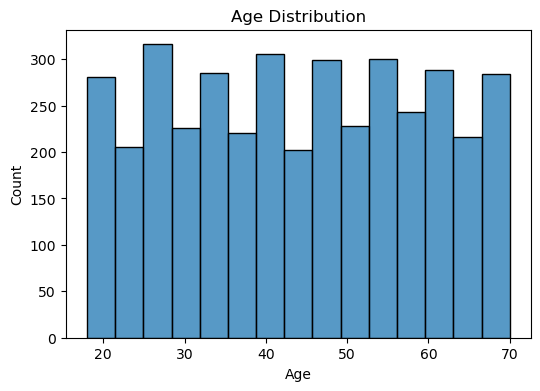

In [40]:
# Example: Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

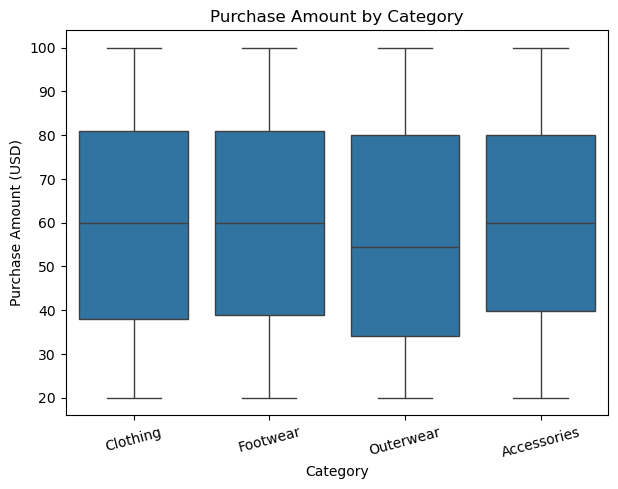

In [41]:
# Boxplot: Purchase Amount by Category
plt.figure(figsize=(7,5))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Category')
plt.xticks(rotation=15)
plt.show()

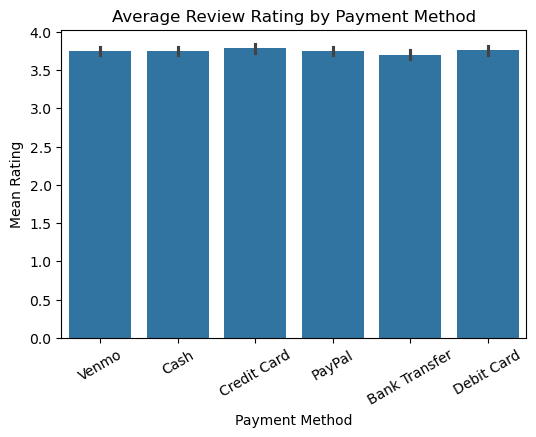

In [42]:
# Barplot: Average Review Rating by Payment Method
plt.figure(figsize=(6,4))
sns.barplot(x='Payment Method', y='Review Rating', data=df, estimator=lambda x: x.mean())
plt.title('Average Review Rating by Payment Method')
plt.xticks(rotation=30)
plt.ylabel('Mean Rating')
plt.show()

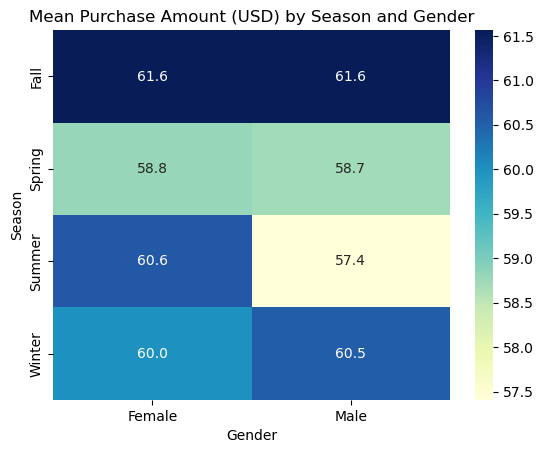

In [43]:
# Heatmap: Mean Purchase Amount by Season and Gender
pivot = pd.pivot_table(df, index='Season', columns='Gender', values='Purchase Amount (USD)', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Mean Purchase Amount (USD) by Season and Gender')
plt.show()